In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [8]:
df=pd.read_csv('titanic-dataset.csv')

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.isnull().sum()
df.drop(['Cabin'], axis=1, inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df.duplicated().sum()

0

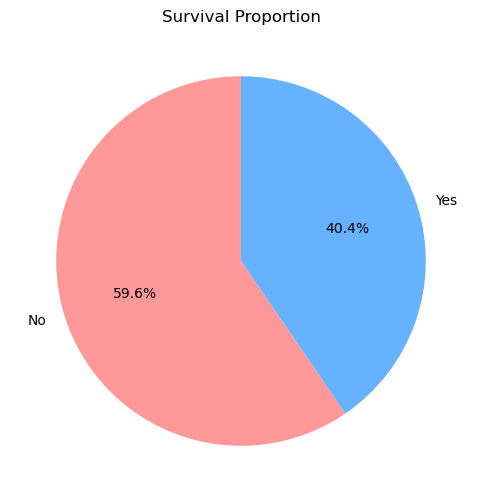

In [14]:
survived_counts = df['Survived'].value_counts()
survived_counts
plt.figure(figsize=(8, 6))
plt.pie(survived_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['#FF9999', '#66B2FF'], startangle=90)
plt.title('Survival Proportion')
plt.show()

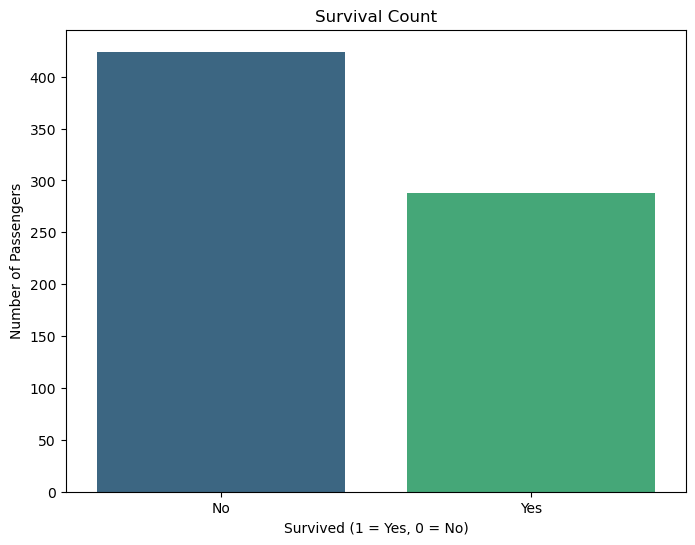

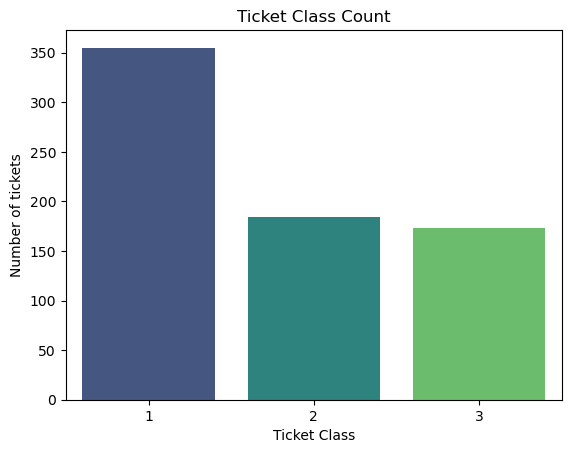

Sex
male      453
female    259
Name: count, dtype: int64

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x=survived_counts.index, y=survived_counts.values, palette='viridis')
plt.title('Survival Count')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Number of Passengers')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()
df['Pclass'].value_counts()
sns.barplot(x=[1,2,3],y=df['Pclass'].value_counts(),palette='viridis')
plt.title("Ticket Class Count")
plt.ylabel('Number of tickets')
plt.xlabel('Ticket Class')
plt.show()
df.Sex.value_counts()

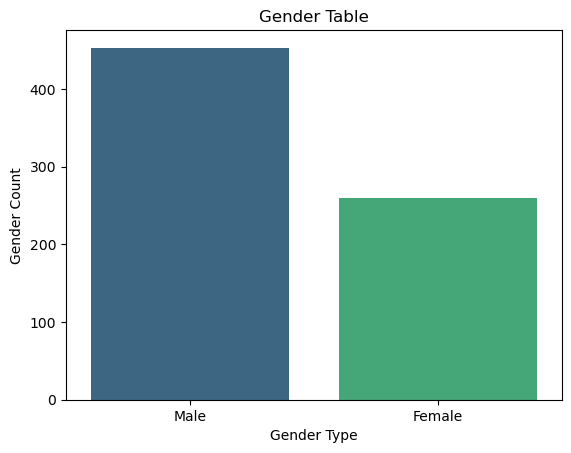

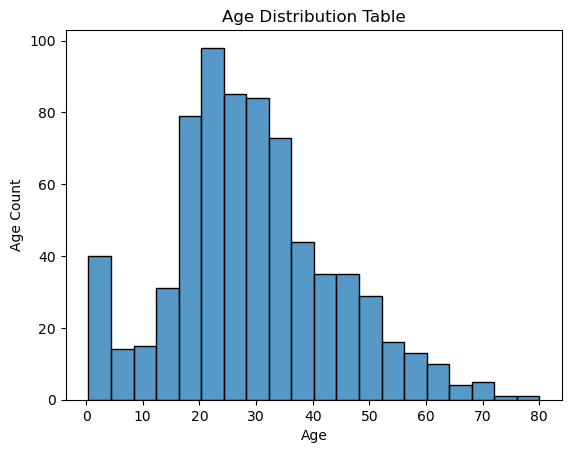

In [16]:
sns.barplot(x=['Male','Female'],y=df.Sex.value_counts(),palette='viridis')
plt.title("Gender Table")
plt.xlabel('Gender Type')
plt.ylabel('Gender Count')
plt.show()
sns.histplot(x=df['Age'],bins=20)
plt.title("Age Distribution Table")
plt.xlabel("Age")
plt.ylabel('Age Count')
plt.show()

In [17]:
Q1= df['Fare'].quantile(0.25)
Q3=df['Fare'].quantile(0.75)

IQR=Q3-Q1

upper=Q3 + 1.5*IQR
Lower=Q1 - 1.5*IQR

print(upper)
print(Lower)
df[df["Fare"]>70]

70.425
-29.374999999999996


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,C
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,S
...,...,...,...,...,...,...,...,...,...,...,...
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,S
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,S
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,S


In [22]:
Embarked_counts=df['Embarked'].value_counts()
Embarked_counts

Embarked
2    554
0    130
1     28
Name: count, dtype: int64

<Axes: ylabel='count'>

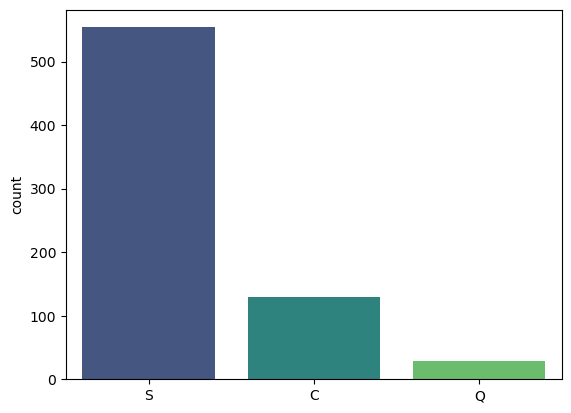

In [23]:
sns.barplot(x=['S','C','Q'],y=Embarked_counts,palette='viridis')

In [24]:
df.groupby(['Sex'])['Survived'].value_counts()

Sex  Survived
0    1           195
     0            64
1    0           360
     1            93
Name: count, dtype: int64

In [26]:
df.groupby(['Pclass'])['Survived'].value_counts()
df.groupby(['Pclass','Sex'])['Survived'].value_counts()

Pclass  Sex  Survived
1       0    1            80
             0             3
        1    0            61
             1            40
2       0    1            68
             0             6
        1    0            84
             1            15
3       0    0            55
             1            47
        1    0           215
             1            38
Name: count, dtype: int64

In [28]:
bins = [0, 18, 35, 50, 65, float('inf')]
labels = ['0-18', '19-35', '36-50', '51-65', '66+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df[df['Survived']==0].groupby(['AgeGroup'])['Survived'].value_counts()


AgeGroup  Survived
0-18      0            52
19-35     0           231
36-50     0            94
51-65     0            37
66+       0            10
Name: count, dtype: int64

In [29]:
df.groupby(['AgeGroup','Sex'])['Survived'].value_counts()
df.groupby(['SibSp'])['Survived'].value_counts()
df.groupby(['Parch'])['Survived'].value_counts()

Parch  Survived
0      0           335
       1           184
1      1            61
       0            49
2      1            39
       0            29
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: count, dtype: int64

# Logistic Regression

In [31]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,0.029526,-0.035609,0.024674,0.033681,-0.082704,-0.011672,0.009655,-0.001836
Survived,0.029526,1.000000,-0.356462,-0.536762,-0.082446,-0.015523,0.095265,0.266100,-0.181979
Pclass,-0.035609,-0.356462,1.000000,0.150826,-0.365902,0.065187,0.023666,-0.552893,0.244145
Sex,0.024674,-0.536762,0.150826,1.000000,0.099037,-0.106296,-0.249543,-0.182457,0.109639
Age,0.033681,-0.082446,-0.365902,0.099037,1.000000,-0.307351,-0.187896,0.093143,-0.032565
SibSp,-0.082704,-0.015523,0.065187,-0.106296,-0.307351,1.000000,0.383338,0.139860,0.033064
Parch,-0.011672,0.095265,0.023666,-0.249543,-0.187896,0.383338,1.000000,0.206624,0.011803
Fare,0.009655,0.266100,-0.552893,-0.182457,0.093143,0.139860,0.206624,1.000000,-0.283510
Embarked,-0.001836,-0.181979,0.244145,0.109639,-0.032565,0.033064,0.011803,-0.283510,1.000000


In [32]:
df.drop(['PassengerId','Ticket','Name','AgeGroup'],axis=1,inplace=True)

In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [35]:
encoder= LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])
df['Embarked']=encoder.fit_transform(df['Embarked'])
df['Survived']=encoder.fit_transform(df['Survived'])
X=df.drop(columns=["Survived"])
y=df.Survived
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250,1
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
889,1,1,26.0,0,0,30.0000,0


In [36]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=7)
model=LogisticRegression(max_iter=12000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=12000)

In [38]:
y_pred=model.predict(X_test)
model.score(X_train,y_train)*100

81.01933216168717

In [39]:
model.score(X_test,y_test)*100
rate=accuracy_score(y_test,y_pred)*100
print(f'{int(rate)}%')

79%


In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84        88
           1       0.80      0.64      0.71        55

    accuracy                           0.80       143
   macro avg       0.80      0.77      0.78       143
weighted avg       0.80      0.80      0.79       143



In [41]:
print(confusion_matrix(y_test,y_pred))

[[79  9]
 [20 35]]


# SCV

In [44]:
modelsv=SVC()
modelsv.fit(X_train,y_train)

SVC()

In [45]:
y_pred=modelsv.predict(X_test)
modelsv.score(X_train,y_train)*100
modelsv.score(X_test,y_test)*100
rate=accuracy_score(y_test,y_pred)*100
print(f'{int(rate)}%')

69%


# KNN Classifier

In [46]:
ModelK=KNeighborsClassifier(n_neighbors=12)
ModelK.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [54]:
y_pred=ModelK.predict(X_test)

In [55]:
ModelK.score(X_train,y_train)*100

73.81370826010544

In [57]:
ModelK.score(X_test,y_test)*100

70.62937062937063

In [60]:
rate=accuracy_score(y_test,y_pred)*100
print(f'{int(rate)}%')

70%


In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77        88
           1       0.64      0.53      0.58        55

    accuracy                           0.71       143
   macro avg       0.69      0.67      0.68       143
weighted avg       0.70      0.71      0.70       143



# Decision Tree Classifier

In [63]:
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [64]:
y_pred=classifier.predict(X_test)
print(classifier.score(X_train,y_train)*100)

98.76977152899823


In [65]:
print(classifier.score(X_test,y_test)*100)

73.42657342657343


In [66]:
print(accuracy_score(y_test,y_pred)*100)

73.42657342657343
